# Unit 5 - Financial Planning

In [83]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [84]:
# Load .env enviroment variables
load_dotenv()

# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [85]:
# Set current amount of crypto assets

bitcoin = 1.2
ethereum = 5.3
cryptocurrencies = bitcoin + ethereum
monthly_income = 12000

In [86]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [87]:
# Fetch current BTC price
btc_data = requests.get(btc_url)
btc_content = btc_data.json()
bitcoin_dollar_rate = btc_content["data"]["1"]["quotes"]["USD"]["price"]
bitcoin_value = bitcoin_dollar_rate * bitcoin

# Fetch current ETH price
eth_data = requests.get(eth_url)
eth_content = eth_data.json()
ethereum_dollar_rate = eth_content["data"]["1027"]["quotes"]["USD"]["price"]
ethereum_value = ethereum_dollar_rate * ethereum

# Compute current value of my crpto
total_crypto_value = bitcoin_value + ethereum_value

# Print current crypto wallet balance
print(f"The current value of your {bitcoin} BTC is ${bitcoin_value:0.2f}")
print(f"The current value of your {ethereum} ETH is ${ethereum_value:0.2f}")

The current value of your 1.2 BTC is $28695.60
The current value of your 5.3 ETH is $10001.36


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [88]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [89]:
# Set Alpaca API key and secret
# YOUR CODE HERE!

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [90]:
# Format current date as ISO format
today = pd.Timestamp("2020-07-14", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df

df_portfolio.head()

# Reorganize the DataFrame
# Separate ticker data
df_portfolio = pd.pivot_table(df_portfolio, columns=['AGG', 'SPY'])
df_portfolio.head()

# Concatenate the ticker DataFrames
# YOUR CODE HERE!

# Preview DataFrame
# YOUR CODE HERE!

,AGG,SPY
close,118.67,318.92
high,118.74,319.76
low,118.58,312.00
open,118.58,313.25
trade_count,14580.00,580270.00


In [91]:
# Pick AGG and SPY close prices
agg_close_price = df_portfolio['AGG']['close']
spy_close_price = df_portfolio['SPY']['close']

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $118.67
Current SPY closing price: $318.92


In [92]:
# Compute the current value of shares
my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $15946.00
The current value of your 200 AGG shares is $23734.00


### Savings Health Analysis

In [93]:
# Set monthly household income
# YOUR CODE HERE!

# Consolidate financial assets data
total_shares = my_spy_value + my_agg_value

# Create savings DataFrame
savings_data = {"value": [total_shares, total_crypto_value]}
asset = ["shares", "crypto"]
df_savings = pd.DataFrame(savings_data, index=asset)

# Display savings DataFrame
display(df_savings)

,value
shares,39680.000
crypto,38696.965


array([<AxesSubplot:ylabel='value'>], dtype=object)

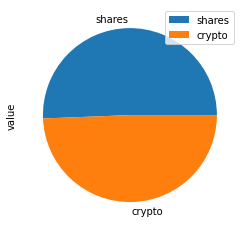

In [94]:
# Plot savings pie chart
df_savings.plot.pie(subplots=True)

In [95]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = total_shares + total_crypto_value
print(f"The value of your total savings is:  {total_savings:0.2f}.")

# Validate saving health
if total_savings > emergency_fund:
    print("You have sufficient savings to start an investment portfolio.")
elif total_savings == emergency_fund:
    print("Congratulations!  You have reached your emergency savings financial goal.")
else:
    print("You should continue to build up your emergency savings.")

The value of your total savings is:  78376.96.
You have sufficient savings to start an investment portfolio.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [96]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [97]:
# Get 5 years' worth of historical data for SPY and AGG
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Reorganize the DataFrame
# Separate ticker data
AGG = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)


# Concatenate the ticker DataFrames
df_portfolio = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])

# Display sample data
df_portfolio.head()

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.61  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.81  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.86  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.14  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.97  2718710   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2016-05-02 04:00:00+00:00       15119  110.627199  206.90  208.18  206.41   
2016-05-03 04:00:00+00:00       15662  110.865995  206.50  206.80  205.28   
2016-05-04 04:00:00+00:00       13982  110.879063  205.00  205.85  204.42   
2016-05-05 04:00:00+00:00       15707  111.028363  205.57  205.98  204.47   
2016-05-06 04:00:00+00:00       12697  111.031967  204.04  205.77  203.88   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2016-05-02 04:00:00+00:00  208.03   61908515      263580  207.294812  
2016-05-03 04:00:00+00:00  206.13  106422142      377518  206.312060  
2016-05-04 04:00:00+00:00  204.96   92199810      345261  205.090172  
2016-05-05 04:00:00+00:00  204.95   67597222      280622  205.141555  
2016-05-06 04:00:00+00:00  205.70   89131004      340335  204.937074

In [98]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
num_sims = 500

# Configure a Monte Carlo simulation to forecast one year daily returns
MC_df = MCSimulation(
    portfolio_data = df_portfolio,
    weights = [.6,.4],
    num_simulation = num_sims,
    num_trading_days = 252*30
)

In [99]:
# Printing the simulation input data



In [100]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_df.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/warrendenetsosie/Desktop/Copy_ASU-Main_Repo/module_5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995985,1.001535,1.004956,1.001023,1.001588,1.002978,0.991425,1.005394,0.998381,1.005007,...,0.997504,0.998110,0.993886,0.988648,1.005049,1.001954,0.997383,1.007493,0.998831,0.996040
2,0.995860,1.007097,1.004769,1.007172,0.995049,1.005598,0.988062,1.005043,0.992958,1.013096,...,0.994950,0.994965,0.988574,0.986216,1.005092,0.996130,0.992163,0.998429,0.991608,1.000969
3,1.004716,1.016987,1.017354,1.004143,0.993329,1.017032,0.984019,1.003652,0.992434,1.009791,...,0.994415,0.995935,0.987427,0.990770,0.999395,0.997051,0.989498,0.997715,0.989975,1.001857
4,1.001188,1.029682,1.019490,1.013209,1.005835,1.014918,0.991473,1.010077,0.988739,1.011498,...,0.999334,0.990784,0.985613,0.992775,1.003441,0.994227,0.995260,0.999618,0.993978,0.991325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,7.227775,4.518565,5.913650,3.620334,8.300598,5.333141,5.550323,8.302194,4.323151,10.066645,...,6.184359,4.131207,7.186956,4.208841,13.715804,7.656279,5.951071,6.521027,10.095652,2.046666
7557,7.212973,4.503522,5.946322,3.605507,8.268836,5.349597,5.540820,8.272442,4.325343,10.034799,...,6.174014,4.137435,7.159251,4.213964,13.816049,7.634179,5.944222,6.543787,10.068431,2.064023
7558,7.155693,4.475446,5.893909,3.598098,8.191021,5.368334,5.541803,8.249201,4.317914,10.102156,...,6.126821,4.141055,7.229754,4.205050,13.813948,7.556771,5.888931,6.468347,10.083275,2.065450
7559,7.178133,4.522649,5.819438,3.590970,8.249137,5.370316,5.490925,8.228662,4.323803,10.044880,...,6.129658,4.179135,7.181992,4.229304,13.821162,7.637877,5.871698,6.507407,10.130415,2.076091


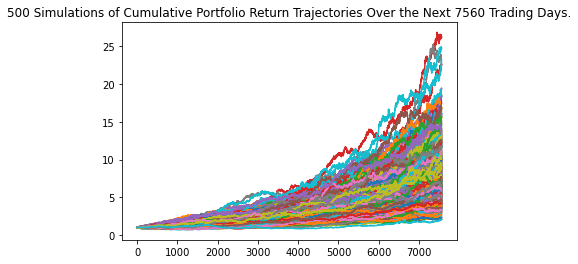

In [101]:
# Plot simulation outcomes
line_plot = MC_df.plot_simulation()

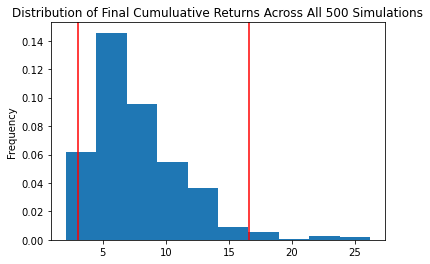

In [102]:
# Plot probability distribution and confidence intervals
dist_plot_60_40 = MC_df.plot_distribution()

### Retirement Analysis

In [134]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_tbl = MC_df.summarize_cumulative_return()

simulated_returns_data = {
    "mean": list(MC_df.simulated_return.mean(axis=1)),
    "median": list(MC_df.simulated_return.median(axis=1)),
    "min": list(MC_df.simulated_return.min(axis=1)),
    "max": list(MC_df.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
df_simulated_returns = pd.DataFrame(simulated_returns_data)

# Display sample data
display(df_simulated_returns)

# Print summary statistics
print(summary_tbl)

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,1.000080,1.000193,0.985565,1.017278
2,1.000080,1.000511,0.978333,1.021799
3,0.999915,1.000042,0.975903,1.029061
4,1.000183,0.999768,0.969297,1.043113
...,...,...,...,...
7556,7.699173,6.888635,2.046666,26.338001
7557,7.702336,6.880788,2.064023,26.170832
7558,7.700283,6.870337,2.065450,26.121186
7559,7.703686,6.868667,2.056443,26.102105


count           500.000000
mean              7.706102
std               3.639332
min               2.062046
25%               5.179339
50%               6.880829
75%               9.499183
max              26.223014
95% CI Lower      3.019824
95% CI Upper     16.614709
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [135]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(summary_tbl[8]*20000,2)
ci_upper = round(summary_tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $60396.49 and $332294.18


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [136]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(summary_tbl[8]*30000,2)
ci_upper = round(summary_tbl[9]*30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $90594.73 and $498441.27


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [106]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
num_sims = 500

In [107]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_df_early = MCSimulation(
    portfolio_data = df_portfolio,
    weights = [.6,.4],
    num_simulation = num_sims,
    num_trading_days = 252*5
)

MC_df_early.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/warrendenetsosie/Desktop/Copy_ASU-Main_Repo/module_5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.006295,0.993774,1.006130,1.000171,1.010772,1.009975,1.007784,0.999179,0.999586,0.997751,...,0.998869,1.000504,0.995582,1.005680,0.993895,1.003419,0.998215,1.003513,1.007898,0.993354
2,0.998867,0.994865,1.002196,0.995460,1.014948,1.011320,1.014753,1.001236,1.002369,0.995788,...,0.999498,1.005177,0.987921,1.007136,0.980310,1.000568,0.989324,1.012804,1.008889,0.987785
3,0.994740,0.993946,0.997852,0.991678,1.011353,1.009035,1.012132,1.012372,1.006584,0.998371,...,0.996922,1.010631,0.981807,1.015445,0.978438,0.994740,0.981603,1.007369,0.998511,0.984667
4,0.996079,0.991366,0.995359,0.987562,1.015685,1.002797,1.013226,1.010673,1.004973,1.000562,...,0.990386,1.006998,0.982412,1.016545,0.981886,0.999211,0.991026,1.008412,0.998435,0.983132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.081180,1.142771,1.388231,1.376091,1.253171,1.560680,1.655557,1.094380,1.779933,1.206348,...,1.340969,1.521457,1.237106,1.549725,2.078157,1.596489,1.368987,1.645018,1.167843,1.455998
1257,1.088327,1.147832,1.372943,1.367426,1.249214,1.562569,1.675927,1.096321,1.772099,1.207005,...,1.339787,1.519472,1.244255,1.541978,2.067249,1.608269,1.378522,1.641026,1.171038,1.458568
1258,1.091700,1.152073,1.378828,1.379087,1.245929,1.565942,1.673091,1.096941,1.778254,1.203696,...,1.343317,1.520578,1.251860,1.549991,2.079979,1.605487,1.385663,1.628766,1.164356,1.457750
1259,1.093132,1.151141,1.379072,1.385710,1.245029,1.575455,1.666741,1.108018,1.790049,1.205995,...,1.338174,1.520322,1.254917,1.537484,2.095143,1.605182,1.392910,1.633943,1.170015,1.472098


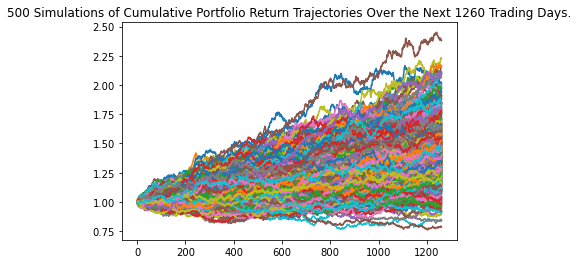

In [108]:
# Plot simulation outcomes
line_plot_2 = MC_df_early.plot_simulation()

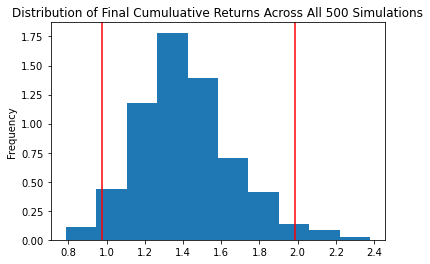

In [109]:
# Plot probability distribution and confidence intervals
dist_plot_2 = MC_df_early.plot_distribution()

In [113]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_tbl_2 = MC_df_early.summarize_cumulative_return()

simulated_returns_data_2 = {
    "mean": list(MC_df_early.simulated_return.mean(axis=1)),
    "median": list(MC_df_early.simulated_return.median(axis=1)),
    "min": list(MC_df_early.simulated_return.min(axis=1)),
    "max": list(MC_df_early.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
df_simulated_returns_2 = pd.DataFrame(simulated_returns_data_2)

# Display sample data
display(df_simulated_returns_2)

# Print summary statistics
MC_df_early.summarize_cumulative_return()

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,1.000311,1.000306,0.984820,1.014697
2,1.000638,1.001147,0.979187,1.019312
3,1.000886,1.001335,0.971799,1.023754
4,1.001322,1.001277,0.967496,1.031758
...,...,...,...,...
1256,1.410346,1.382059,0.790190,2.388351
1257,1.410677,1.381629,0.790142,2.393265
1258,1.411223,1.381647,0.793757,2.384391
1259,1.411805,1.385585,0.788027,2.382381


count           500.000000
mean              1.412453
std               0.250105
min               0.786362
25%               1.248214
50%               1.386612
75%               1.557746
max               2.379713
95% CI Lower      0.975615
95% CI Upper      1.985702
Name: 1260, dtype: float64

In [131]:
# Set initial investment
initial_investment_early = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(summary_tbl_2[8]*60000,2)
ci_upper_five = round(summary_tbl_2[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_early} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $58536.89 and $119142.15


### Ten Years Retirement Option

In [118]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_df_early_ten = MCSimulation(
    portfolio_data = df_portfolio,
    weights = [.6,.4],
    num_simulation = num_sims,
    num_trading_days = 252*10
)

In [119]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns

MC_df_early_ten.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/warrendenetsosie/Desktop/Copy_ASU-Main_Repo/module_5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.994864,0.999561,1.005255,0.987704,0.995844,1.008546,1.007952,0.998870,1.000488,1.002006,...,1.003178,0.995976,0.999475,1.002826,1.009407,0.995527,1.000294,0.997106,0.998753,0.993746
2,0.987293,1.004996,1.003373,0.990134,0.988370,1.007877,1.013266,1.001672,1.006065,1.003555,...,1.004808,0.989704,0.996256,1.005992,1.006459,0.997066,1.004978,0.988624,1.005727,1.002385
3,0.994639,1.002116,1.003887,0.996714,0.982396,1.004169,1.006003,1.008008,1.011347,0.999786,...,1.005441,0.992026,1.000376,1.016969,1.005181,1.001428,1.003775,0.990922,1.002984,1.001233
4,0.997857,0.998950,0.994193,0.997356,0.974578,0.993283,1.010067,1.019308,1.019087,0.997706,...,1.012292,0.987582,1.002431,1.014212,1.001843,1.002464,0.996154,0.996842,1.000971,1.007824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.830440,1.874584,2.119815,1.968535,1.466521,1.698417,2.327327,1.599468,1.628579,1.714333,...,1.522007,1.923211,2.214409,1.722624,2.282378,2.271227,1.177046,1.742535,2.936485,1.652180
2517,1.813059,1.875474,2.126735,1.994914,1.459744,1.701388,2.340210,1.604572,1.607750,1.704202,...,1.517901,1.932316,2.238801,1.736486,2.307472,2.282132,1.181266,1.741191,2.912703,1.650112
2518,1.820517,1.877845,2.130845,1.989419,1.463878,1.680645,2.346438,1.614283,1.608069,1.705039,...,1.493258,1.935724,2.244641,1.750937,2.323839,2.284000,1.191466,1.757772,2.912676,1.639892
2519,1.813474,1.877192,2.142014,1.995993,1.467636,1.679356,2.344787,1.608180,1.621118,1.714776,...,1.484549,1.941677,2.247817,1.761291,2.300343,2.297574,1.190243,1.751361,2.902340,1.627619


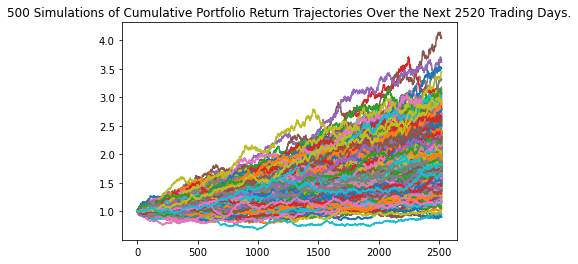

In [120]:
# Plot simulation outcomes
line_plot_3 = MC_df_early_ten.plot_simulation()

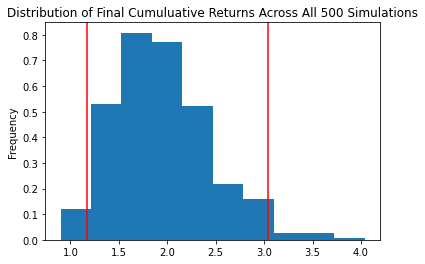

In [121]:
# Plot probability distribution and confidence intervals
dist_plot_3 = MC_df_early_ten.plot_distribution()

In [122]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_tbl_3 = MC_df_early_ten.summarize_cumulative_return()

simulated_returns_data_3 = {
    "mean": list(MC_df_early_ten.simulated_return.mean(axis=1)),
    "median": list(MC_df_early_ten.simulated_return.median(axis=1)),
    "min": list(MC_df_early_ten.simulated_return.min(axis=1)),
    "max": list(MC_df_early_ten.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
df_simulated_returns_3 = pd.DataFrame(simulated_returns_data_3)

# Display sample data
display(df_simulated_returns_2)

# Print summary statistics
MC_df_early_ten.summarize_cumulative_return()

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,1.000311,1.000306,0.984820,1.014697
2,1.000638,1.001147,0.979187,1.019312
3,1.000886,1.001335,0.971799,1.023754
4,1.001322,1.001277,0.967496,1.031758
...,...,...,...,...
1256,1.410346,1.382059,0.790190,2.388351
1257,1.410677,1.381629,0.790142,2.393265
1258,1.411223,1.381647,0.793757,2.384391
1259,1.411805,1.385585,0.788027,2.382381


count           500.000000
mean              1.948688
std               0.488374
min               0.897465
25%               1.587905
50%               1.881080
75%               2.233790
max               4.040283
95% CI Lower      1.169749
95% CI Upper      3.044772
Name: 2520, dtype: float64

In [132]:
# Set initial investment
initial_investment_ten = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(summary_tbl_3[8]*60000,2)
ci_upper_ten = round(summary_tbl_3[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 10 years will end within in the range of $70184.92 and $182686.34
